# Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

$\rightrightarrow$

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

#####  Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта? _..._
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры. _потому что при большом количестве узлов можно отделить каждый объект в отдельности, но размер его может быть крайне большим_
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)? _Необходимо отметить, что многоуровневое ветвление на самом деле не имеет никаких преимуществ (потому что любое многоуровневое ветвление может быть представлено в виде нескольких последовательных двоичных ветвлений), но может иметь определенные недостатки. В некоторых пакетах фиксированная предикторная переменная может быть использована для многоуровневого ветвления лишь один раз, так что получающееся в результате дерево классификации оказывается слишком коротким и неинтересным. Более серьезная трудность связана со смещением при выборе переменной для ветвления. Смещение в выборе переменной проявляется в том, что преимущественно выбираются переменные, имеющие много уровней значений, и такое смещение может исказить относительную важность разных предикторных переменных в смысле их влияния на отклик зависимой переменной._
4. Как устроен жадный алгоритм построения дерева? _выбирается узел с минимальным значением $G(j, t)$_
5. Какие критерии информативности для решения задачи классификации вы знаете? _мисклассификация, энтропия, критерий Джини_
6. Какой смысл у критерия Джини и энтропийного критерия? _энтропия: мера неопределённости случайной величины, то, насколько сильно отличется подвыборка от вырожденной; критерий Джини: вероятность неправильной классификации, если предсказывать классы с вероятностями их появления в этом узле_
7. Какие критерии информативности для решения задачи регрессии вы знаете? _MSE_
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете? _пропустить записи, заполнить значением (0, mean, median etc), категория NA, суррогатные предикаторы_
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

**Ответ:** 

Пусть:

$r_{mean}$ - случайная величина, равная ошибке при ответе средним значением

$r_{rand}$ - случайная величина, равная ошибке при ответе случайным значением

$a_i,\,\,i\in\{1, 2, \ldots, n\}$ - таргеты

$a_{real}$ - истинное значение величины

Тогда $\mathbb{E}r_{mean} = \cfrac{1}{n}\sum_{i=1}^{n}\left(a_i - \cfrac{1}{n}\sum_{i=1}^{n}a_i\right)^2 = \cfrac{1}{n}\sum_{i=1}^{n}a_i^2 + \cfrac{1}{n}\left(\sum_{i=1}^{n}a_i\right)^2 - 2\overline{a}^2 = \cfrac{1}{n}\sum_{i=1}^{n}a_i^2 - \cfrac{1}{n}\sum_{i, j }^{n}a_ia_j = \mathbb{D}$

$\mathbb{E}r_{rand} = \cfrac{1}{n}\sum_{i=1}^{n}\cfrac{1}{n}\sum_{j=1}^{n}\left(a_j - a_i\right)^2 = \cfrac{2}{n}\sum_{i=1}^{n}a_i^2 - \cfrac{2}{n}\sum_{i, j }^{n}a_ia_j = 2\mathbb{D}$

$\mathbb{D} < 2\mathbb{D}$, значит, $\mathbb{E}r_{mean}$ меньше.

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $L$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

Пусть $T(R, c) = \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c)$

1. $T^\prime_c(R, c) = 2nc -2\sum_{i} y_i = 0 $ (несложно показать, что минимум) $\Rightarrow c = \overline{y} \Rightarrow H(R) = \sum_i(y_i-\overline{y})^2 = \mathbb{D}$

2. В точке экстремума градиент должен быть равен 0. Значит, производные по каждой из переменных должны быть равны 0.
$$\left(\frac{1}{n}\sum_y\sum_k^K(c_k-[y=k])^2\right)^\prime_{c_i} = \left(\frac{1}{n}\sum_y\sum_k^K(c_k^2 + [y=k]^2 - 2c_k[y=k])\right)^\prime_{c_i} = \frac{1}{n}\sum_y(2c_i - 2[y=k_i]) = 2c_i - 2p_i = 0$$ $$\Rightarrow c_i = p_i$$

3. $niasilil$

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значения этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативности константной.

**Ответ:** в худшем случае $O(ld\cdot \min(l, 2^D)) $

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

Data description:

```buying       v-high, high, med, low
maint        v-high, high, med, low
doors        2, 3, 4, 5-more
persons      2, 4, more
lug_boot     small, med, big
safety       low, med, high```

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

In [13]:
# Ваш код здесь
headers = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', names=headers)
data.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [14]:
data.sample(5)

buying maint doors persons lug_boot safety  class
580    high  high     3       4      med    med  unacc
1000    med  high     3       2    small    med  unacc
1147    med   med     4       4      med    med    acc
1567    low   med     4       2    small    med  unacc
566    high  high     2    more      big   high    acc

In [15]:
data.describe()

buying  maint doors persons lug_boot safety  class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2      big   high  unacc
freq      432    432   432     576      576    576   1210

In [16]:
data.shape

(1728, 7)

In [17]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()

data['buying'].replace({'vhigh':3, 'high':2, 'med':1, 'low':0}, inplace=True)
data['maint'] .replace({'vhigh':3, 'high':2, 'med':1, 'low':0}, inplace=True)
data['doors'].replace({'2':2, '3':3, '4':4, '5more':5}, inplace=True)
data['persons'].replace({'2':2, '4':4, 'more':5}, inplace=True)
data['lug_boot'].replace({'small':0, 'med':1, 'big':2}, inplace=True)
data['safety'].replace({'low':0, 'med':1, 'high':2}, inplace=True)
data['class'].replace({'unacc':0, 'acc':1, 'good':2, 'vgood':3}, inplace=True)

In [18]:
data.groupby(['class']).count()

buying  maint  doors  persons  lug_boot  safety
class                                                 
0        1210   1210   1210     1210      1210    1210
1         384    384    384      384       384     384
2          69     69     69       69        69      69
3          65     65     65       65        65      65

In [19]:
data.head(10)

buying  maint  doors  persons  lug_boot  safety  class
0       3      3      2        2         0       0      0
1       3      3      2        2         0       1      0
2       3      3      2        2         0       2      0
3       3      3      2        2         1       0      0
4       3      3      2        2         1       1      0
5       3      3      2        2         1       2      0
6       3      3      2        2         2       0      0
7       3      3      2        2         2       1      0
8       3      3      2        2         2       2      0
9       3      3      2        4         0       0      0

In [20]:
data.describe()

buying        maint        doors      persons     lug_boot  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     3.500000     3.666667     1.000000   
std       1.118358     1.118358     1.118358     1.247580     0.816733   
min       0.000000     0.000000     2.000000     2.000000     0.000000   
25%       0.750000     0.750000     2.750000     2.000000     0.000000   
50%       1.500000     1.500000     3.500000     4.000000     1.000000   
75%       2.250000     2.250000     4.250000     5.000000     2.000000   
max       3.000000     3.000000     5.000000     5.000000     2.000000   

            safety        class  
count  1728.000000  1728.000000  
mean      1.000000     0.414931  
std       0.816733     0.740700  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       1.000000     0.000000  
75%       2.000000     1.000000  
max       2.000000     3.000000

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null int64
maint       1728 non-null int64
doors       1728 non-null int64
persons     1728 non-null int64
lug_boot    1728 non-null int64
safety      1728 non-null int64
class       1728 non-null int64
dtypes: int64(7)
memory usage: 94.6 KB


Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [22]:
import IPython.display #needed to render in notebook
import pydot  #needed to convert dot format to png
from io import StringIO
from sklearn import tree
import pydotplus

def draw_decision_tree(clf, column_names): 
    
    dot_data = StringIO() 
    tree.export_graphviz(clf, out_file=dot_data, feature_names=column_names) 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())     #pydotPLUS
    print(graph)
    a = IPython.display.Image(graph.create_png())
    IPython.display.display(a)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['class'], axis=1), data['class'], test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1296, 6), (432, 6), (1296,), (432,))

In [16]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

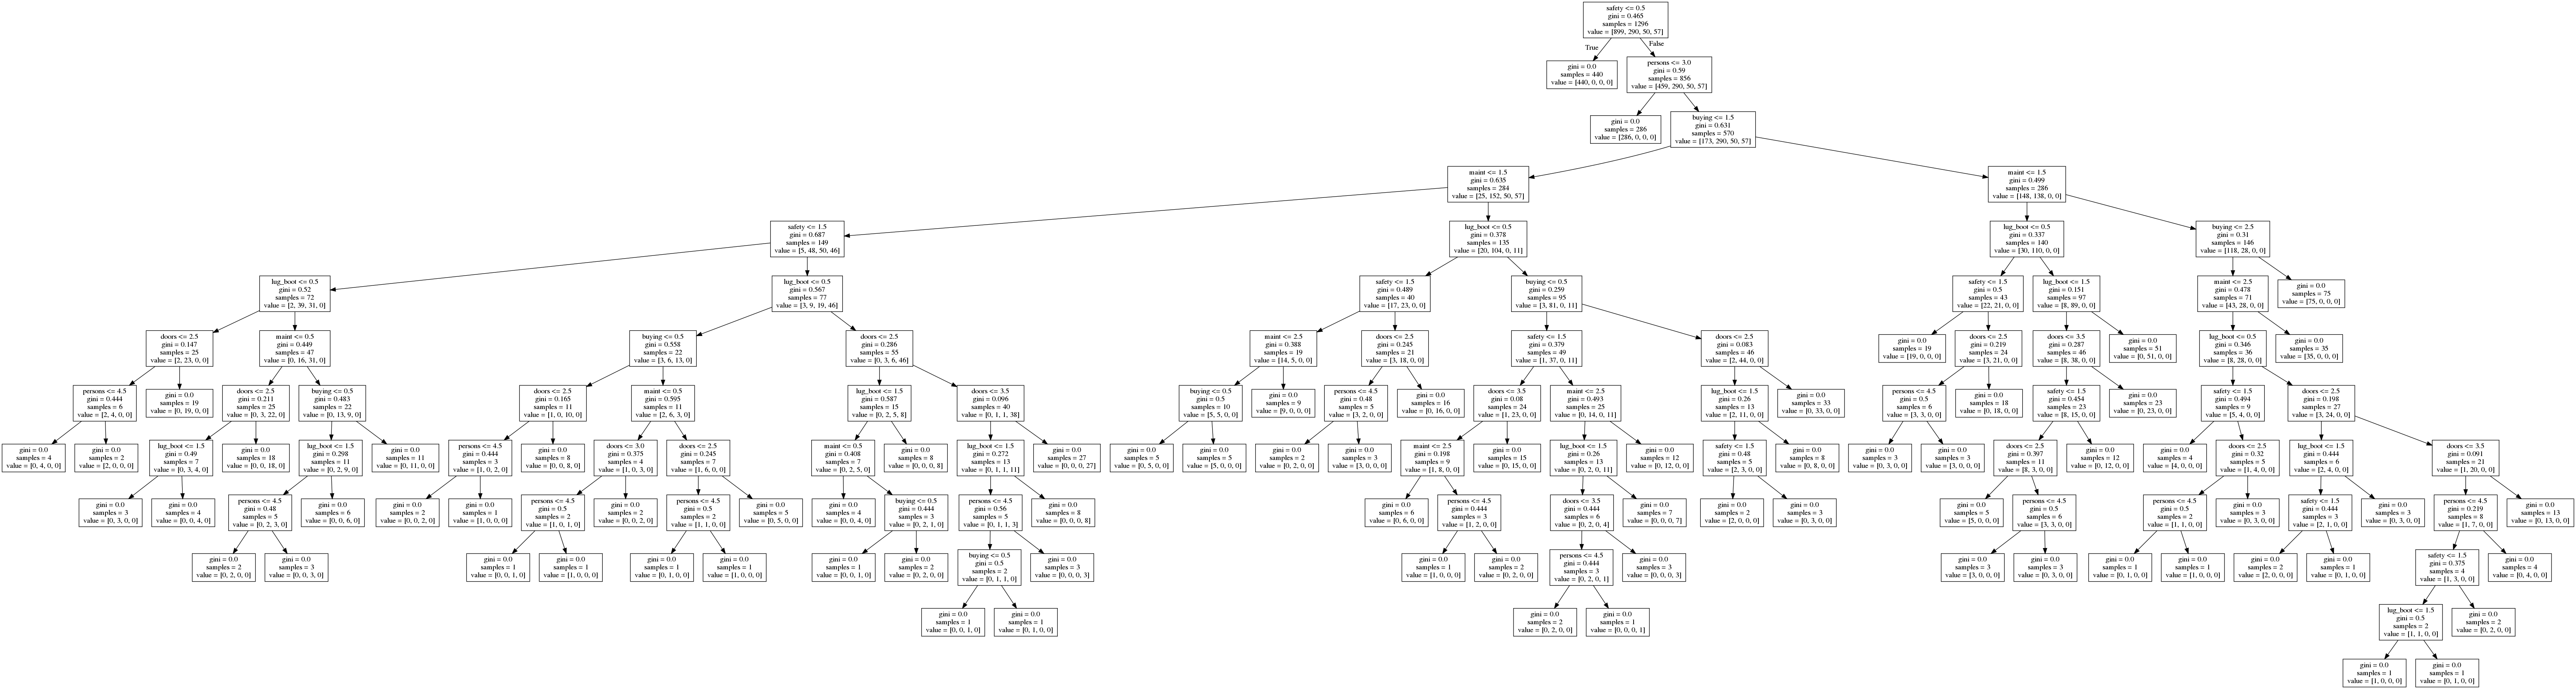

In [17]:
draw_decision_tree(classifier, headers[:-1])

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры `max_depth`, `criterion`, `min_samples_leaf`, `max_features`). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

In [32]:
# Ваш код здесь
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def characterize(pred, y_true):
    print('accuracy :', accuracy_score (pred, y_true))

maxdepth = 1
accuracy : 0.719907407407


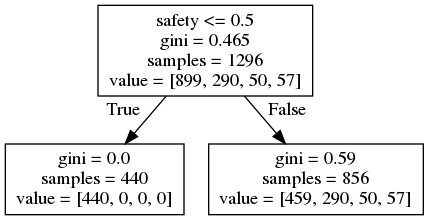

maxdepth = 2
accuracy : 0.759259259259


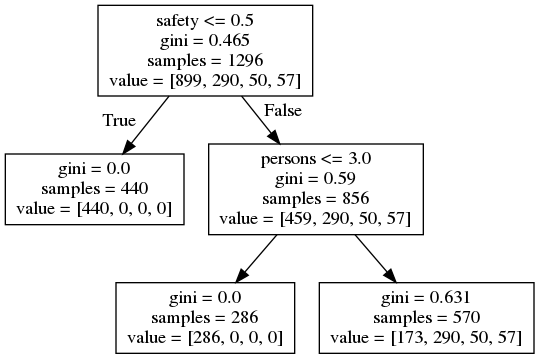

maxdepth = 3
accuracy : 0.791666666667


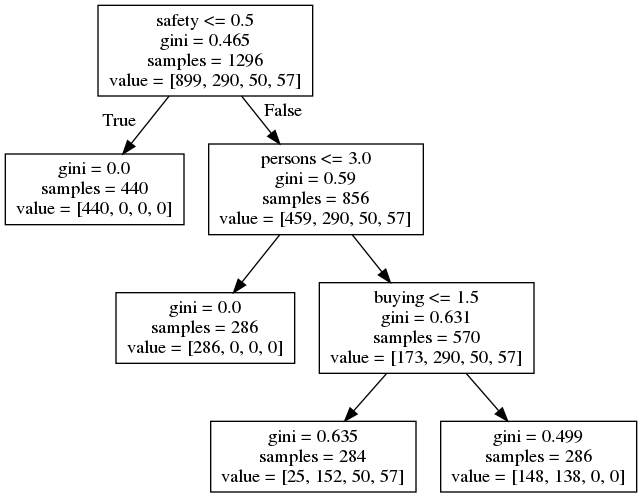

maxdepth = 4
accuracy : 0.837962962963


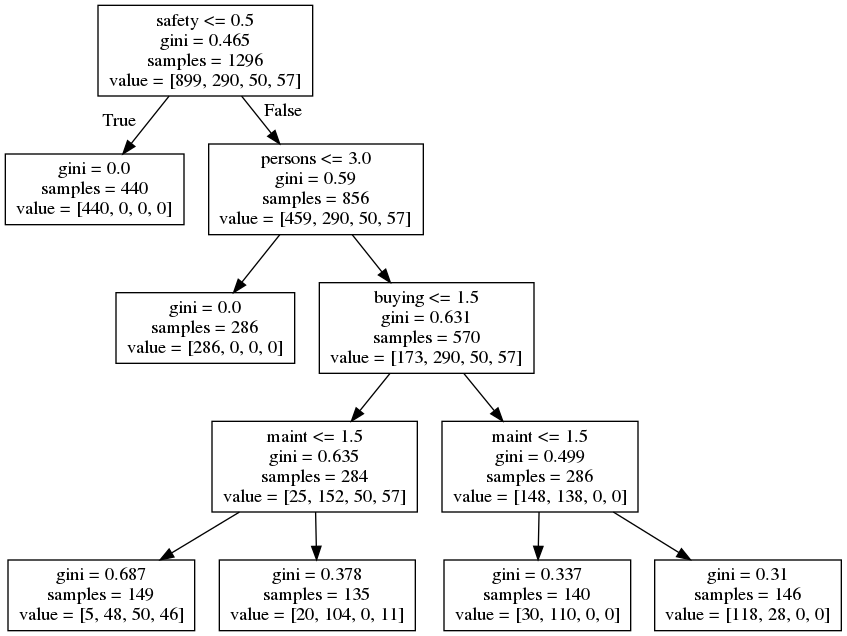

maxdepth = 10
accuracy : 0.965277777778


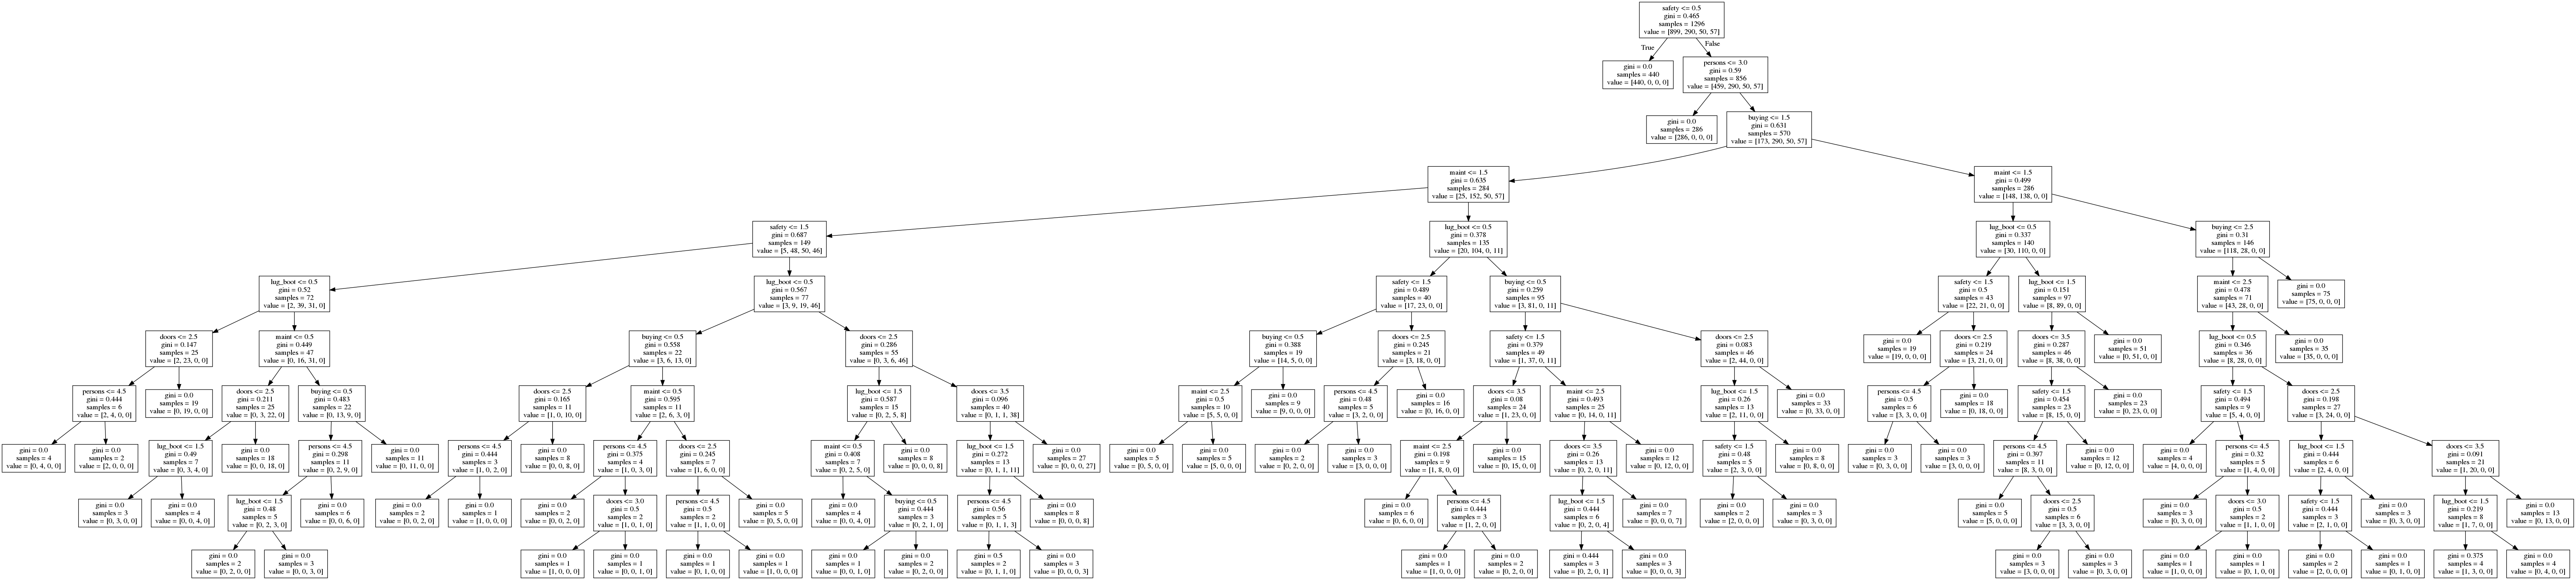

maxdepth = 20
accuracy : 0.967592592593


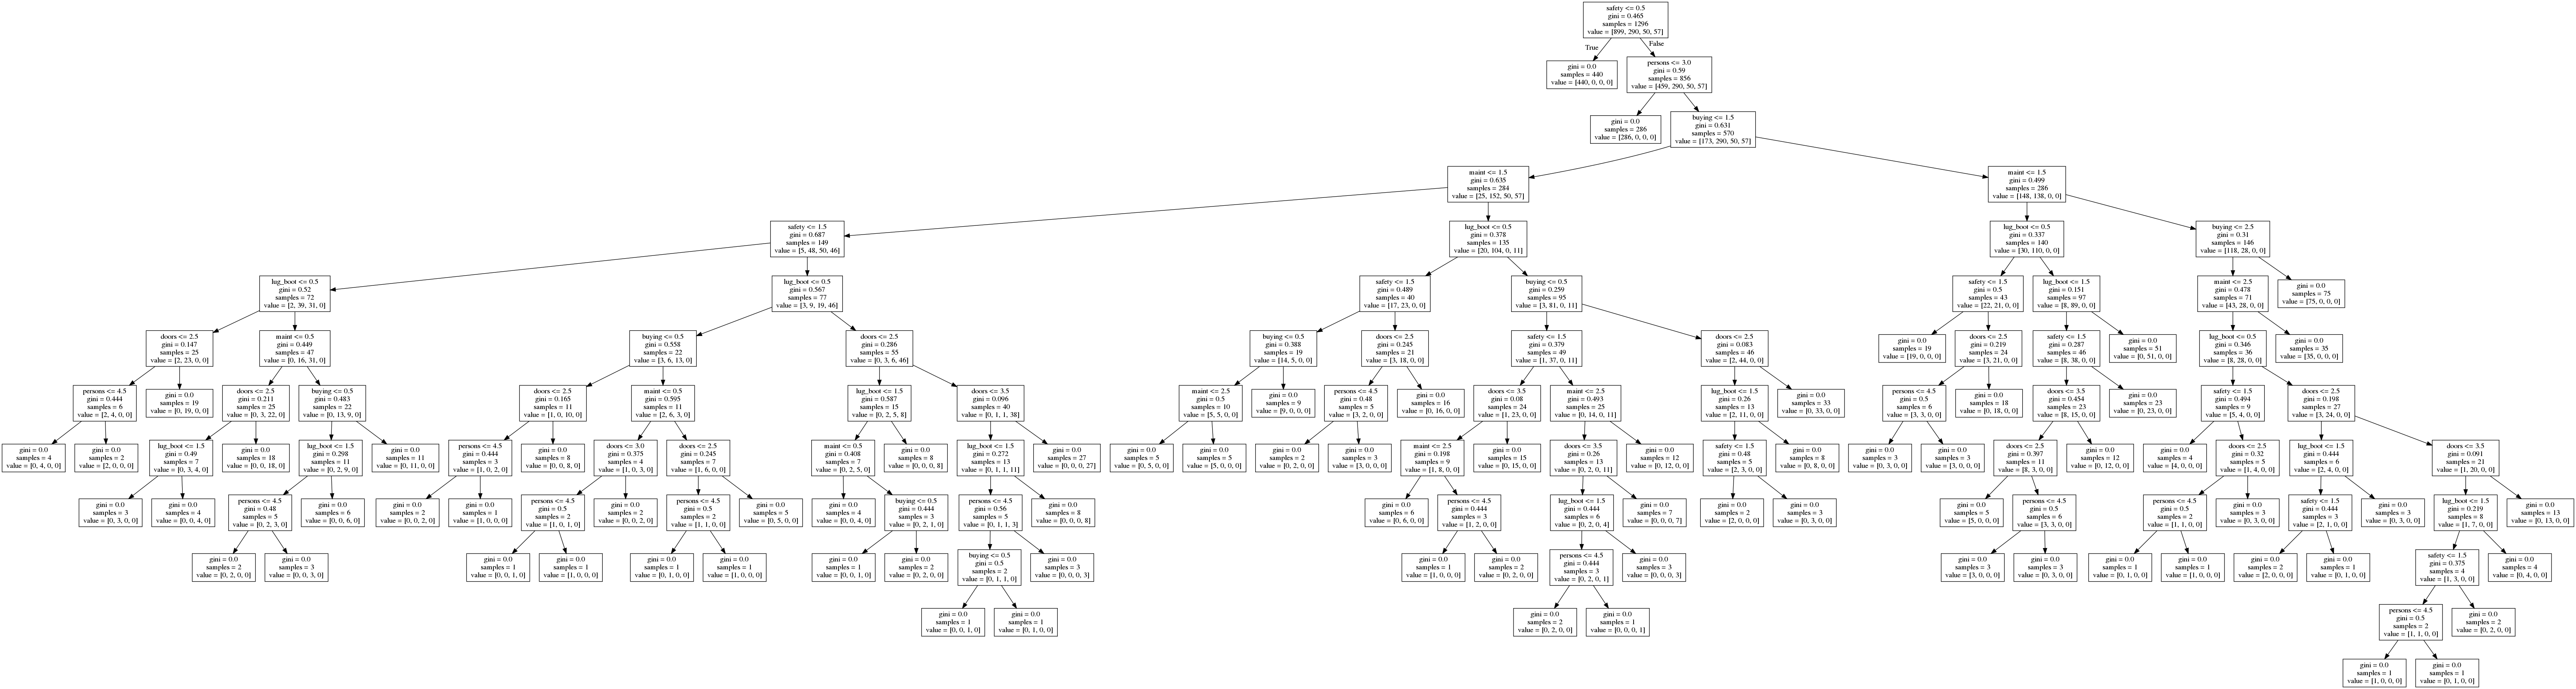

In [19]:
for max_depth in [1, 2, 3, 4, 10, 20]:
    print('maxdepth =', max_depth)
    classifier = DecisionTreeClassifier(max_depth=max_depth)
    classifier.fit(X_train, y_train)
    characterize(classifier.predict(X_test), y_test)
    draw_decision_tree(classifier, headers[:-1])

info criterion = gini
accuracy : 0.967592592593


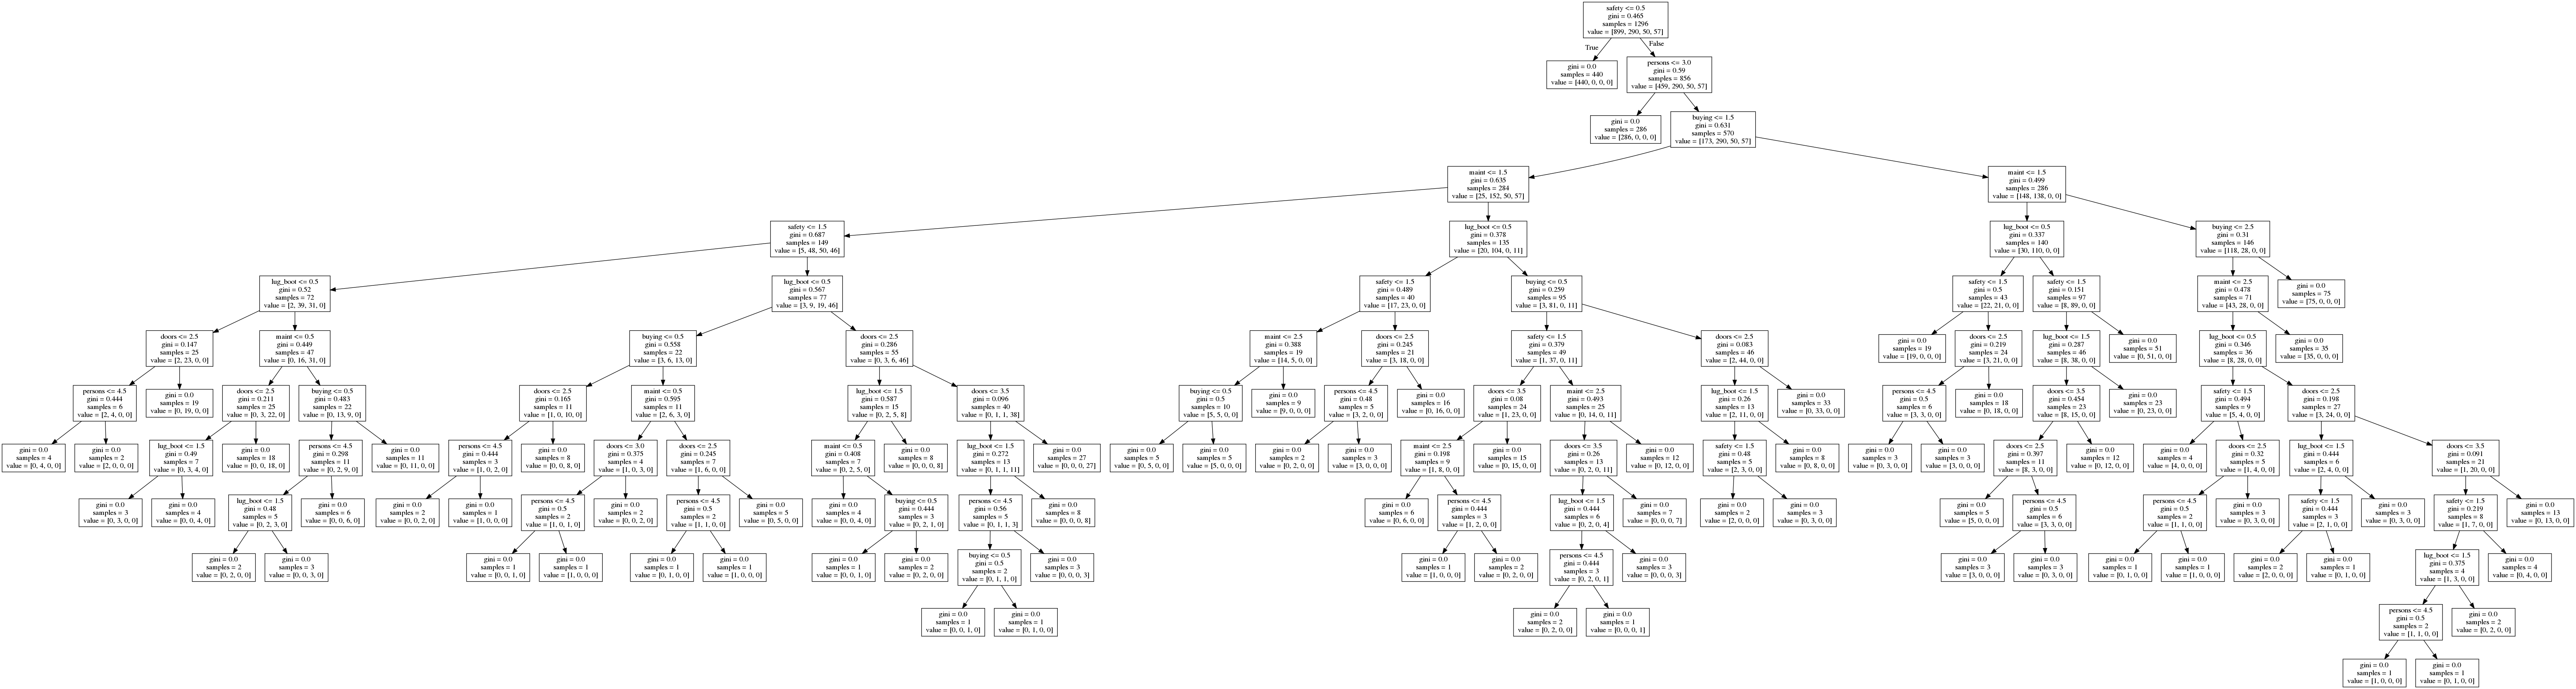

info criterion = entropy
accuracy : 0.969907407407


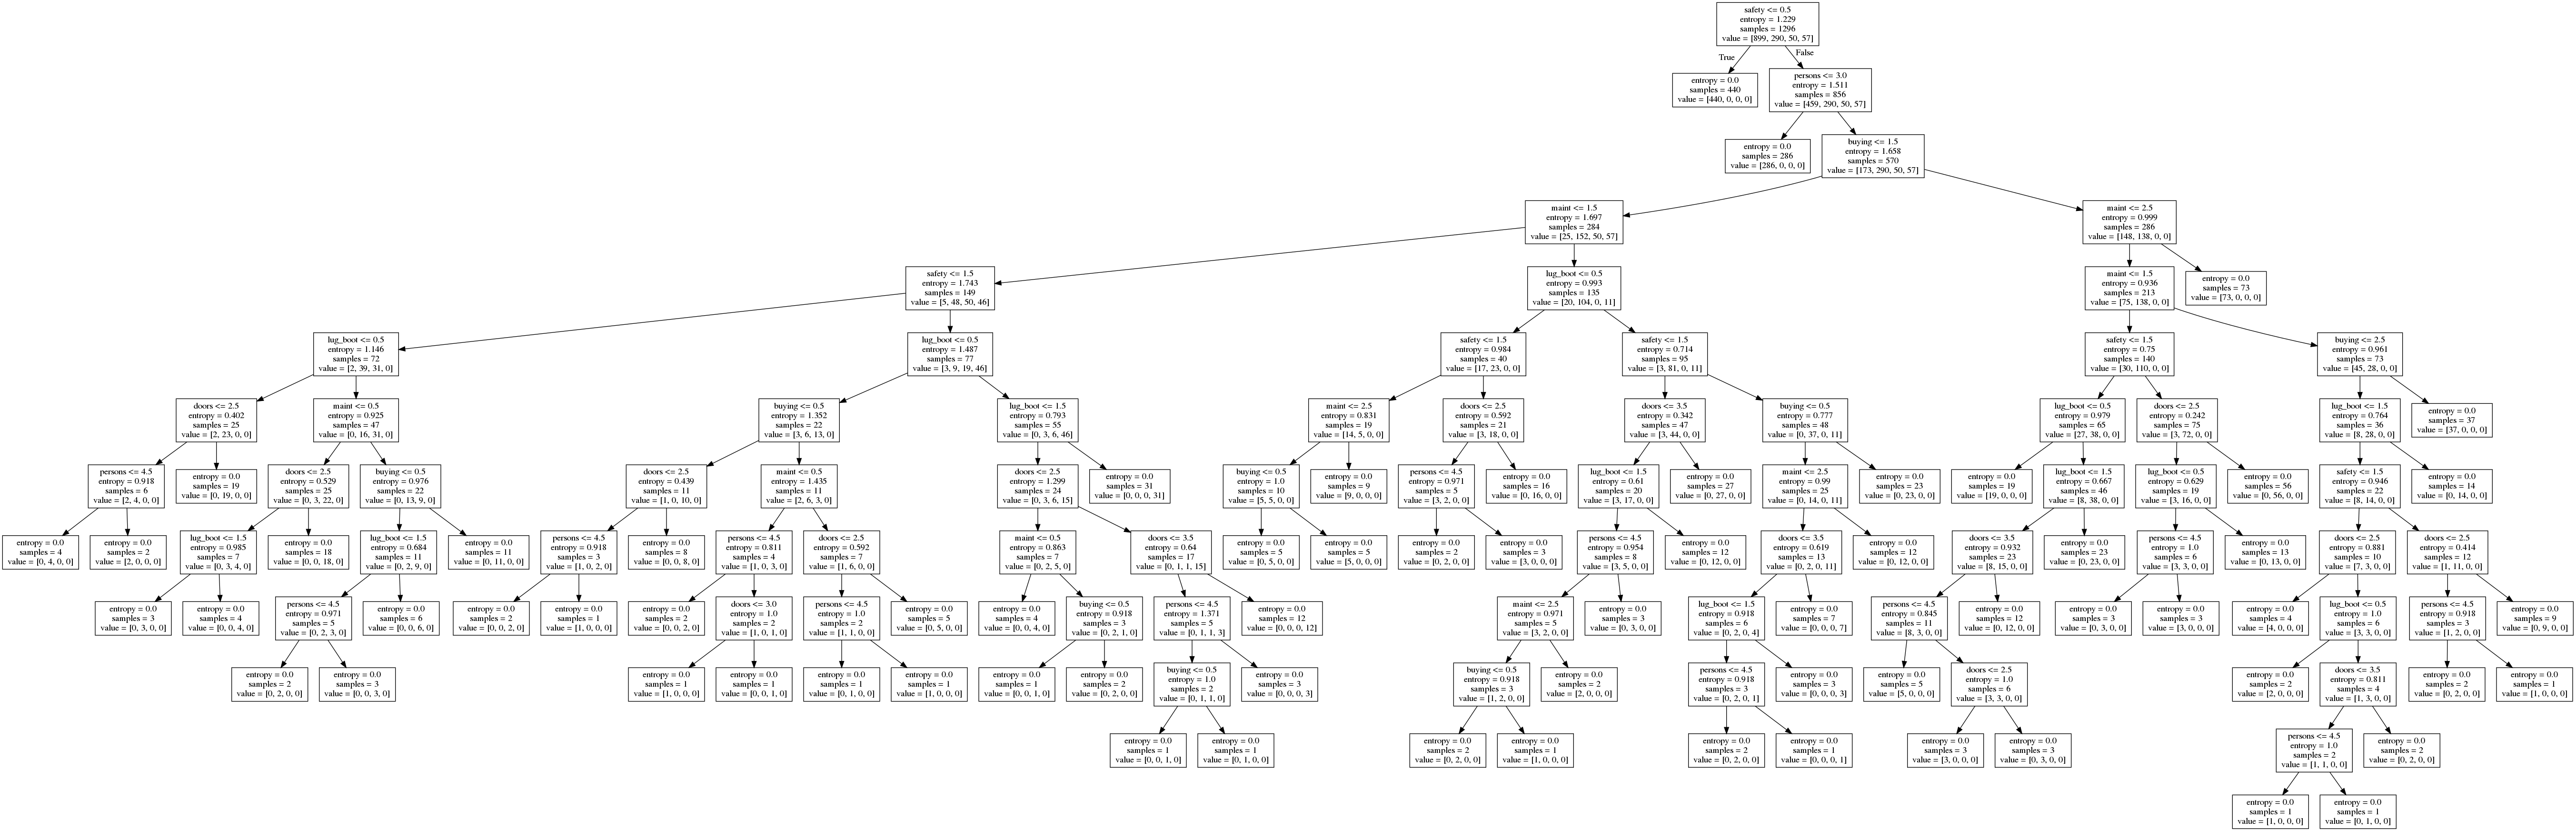

In [20]:
for criterion in ['gini', 'entropy']:
    print('info criterion =', criterion)
    classifier = DecisionTreeClassifier(criterion=criterion)
    classifier.fit(X_train, y_train)
    characterize(classifier.predict(X_test), y_test)
    draw_decision_tree(classifier, headers[:-1])

samples leaf = 50.0 %
accuracy : 0.719907407407


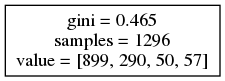

samples leaf = 20.0 %
accuracy : 0.791666666667


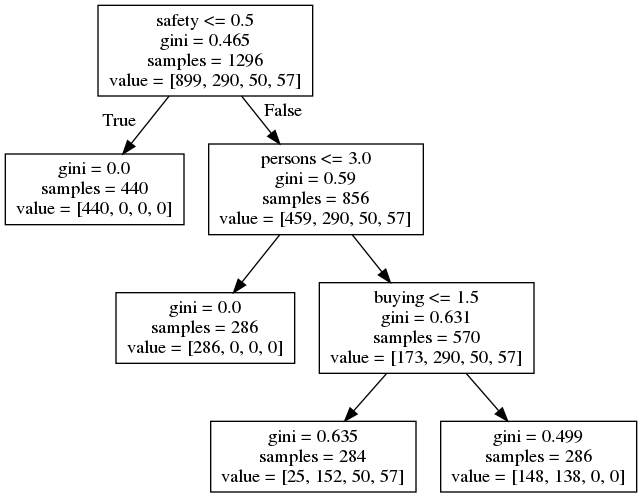

samples leaf = 10.0 %
accuracy : 0.837962962963


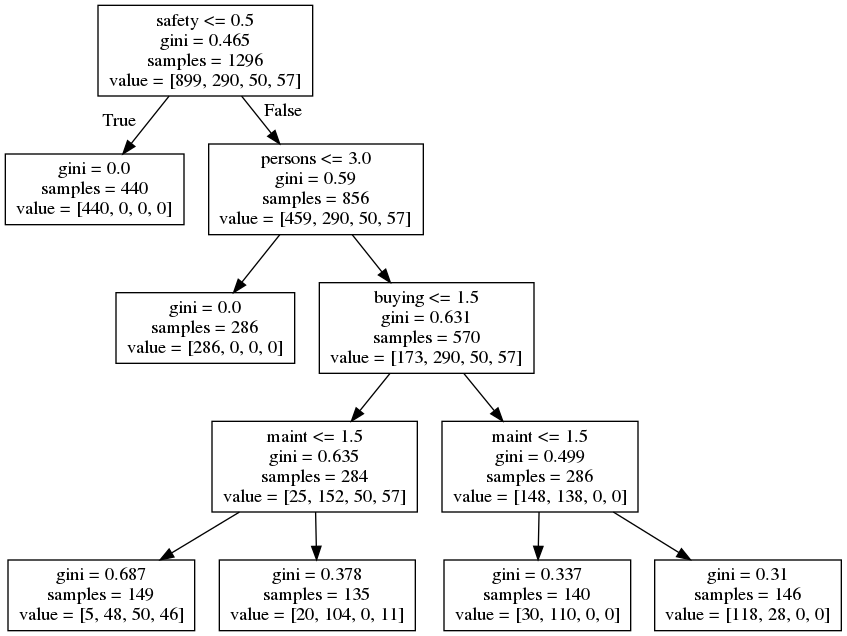

samples leaf = 5.0 %
accuracy : 0.840277777778


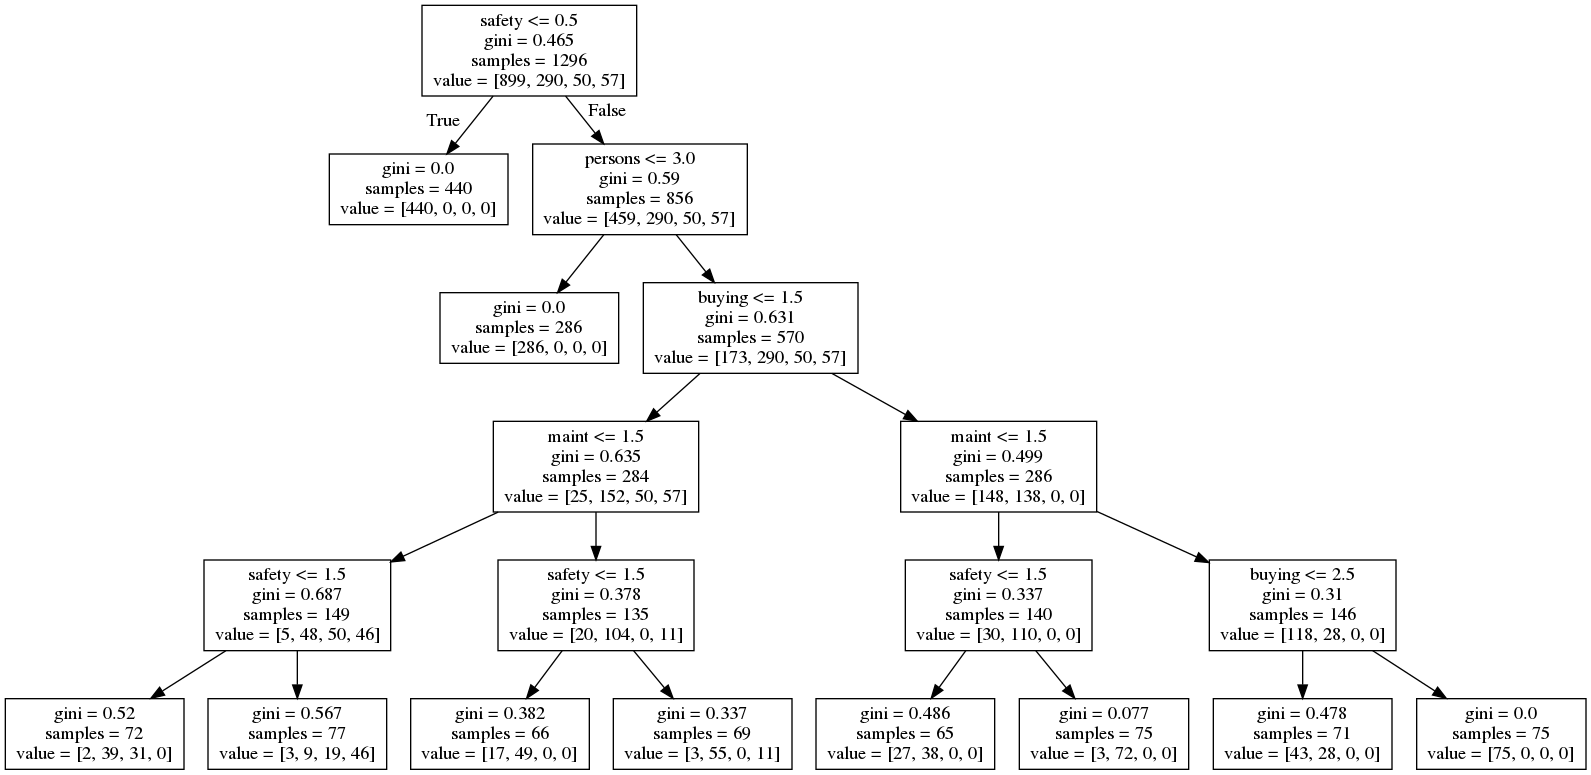

samples leaf = 1.0 %
accuracy : 0.921296296296


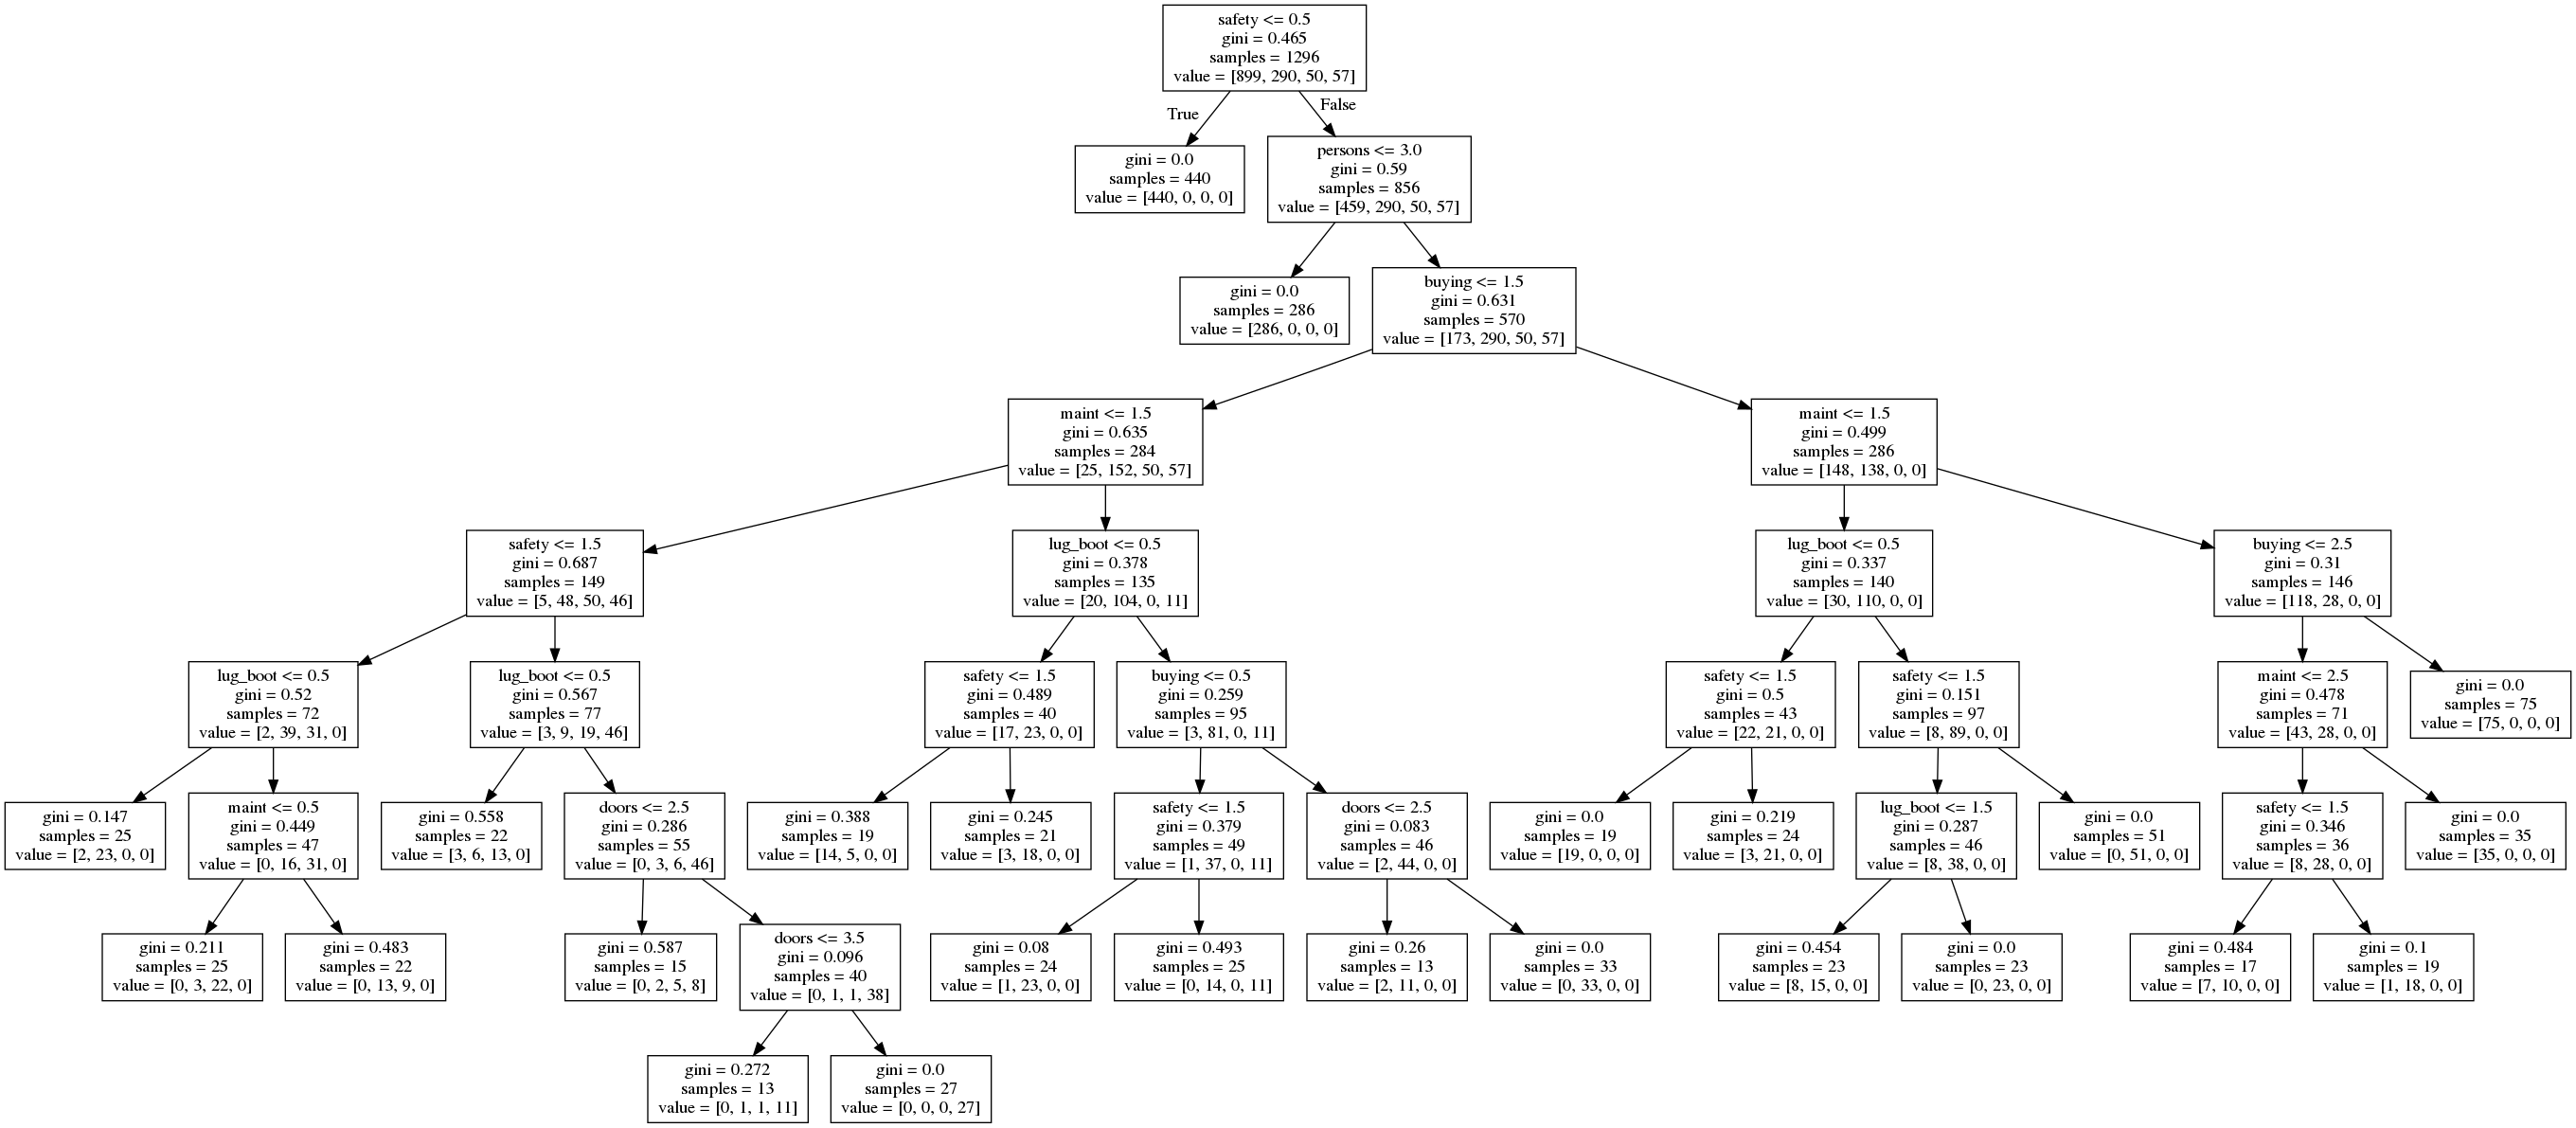

samples leaf = 0.1 %
accuracy : 0.951388888889


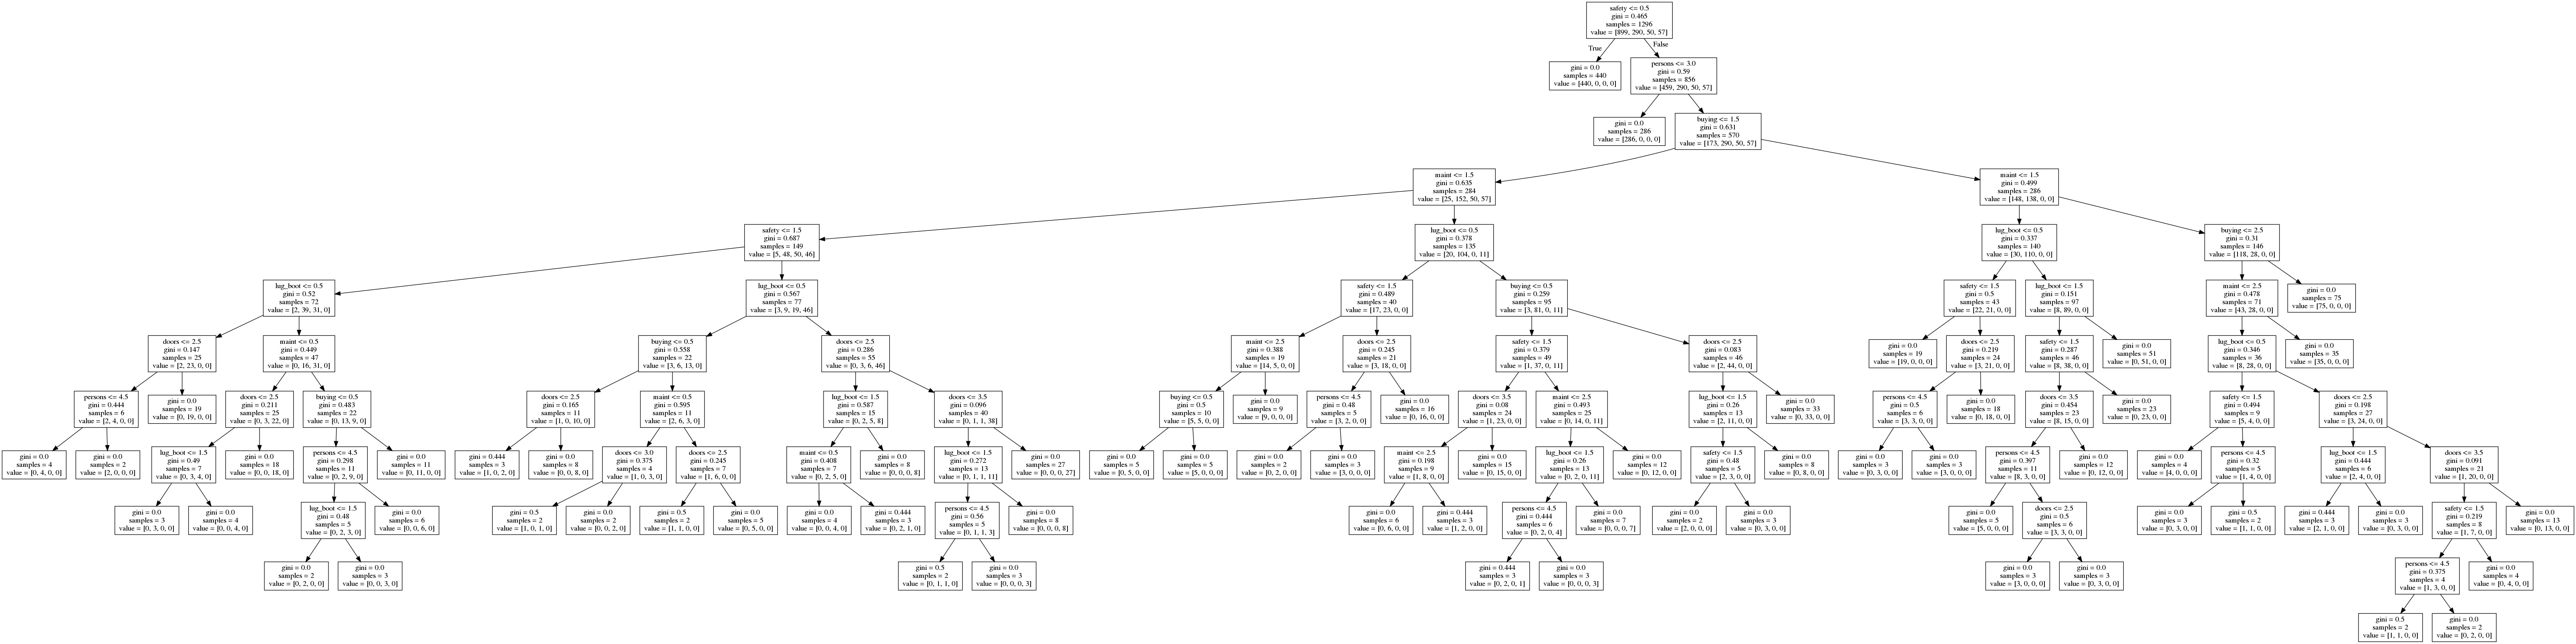

In [21]:
# min_samples_leaf

for min_samples_leaf in [0.5, 0.2, 0.1, 0.05, 0.01, 0.001]:
    print('samples leaf =', min_samples_leaf*100, '%')
    classifier = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    classifier.fit(X_train, y_train)
    characterize(classifier.predict(X_test), y_test)
    draw_decision_tree(classifier, headers[:-1])

features = 1
accuracy : 0.877314814815


features = 2
accuracy : 0.94212962963


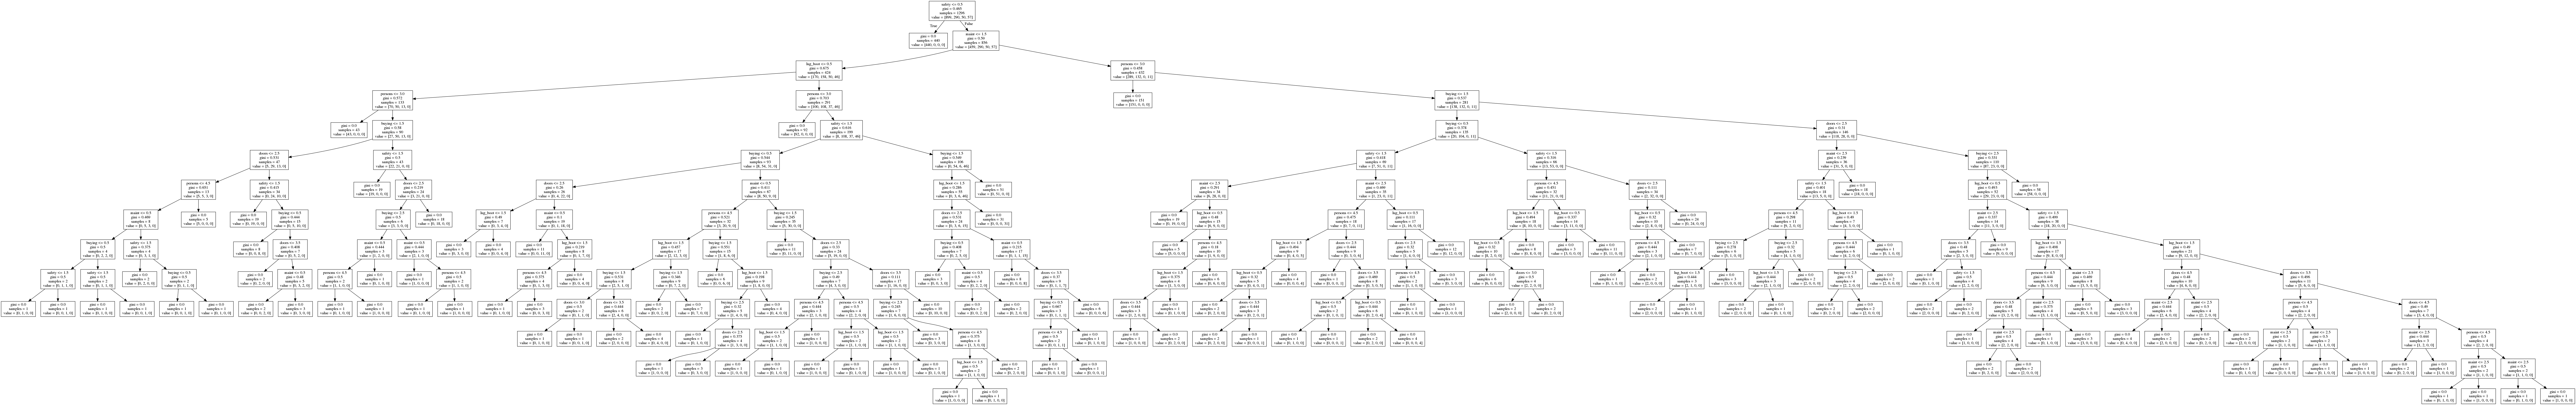

features = 3
accuracy : 0.944444444444


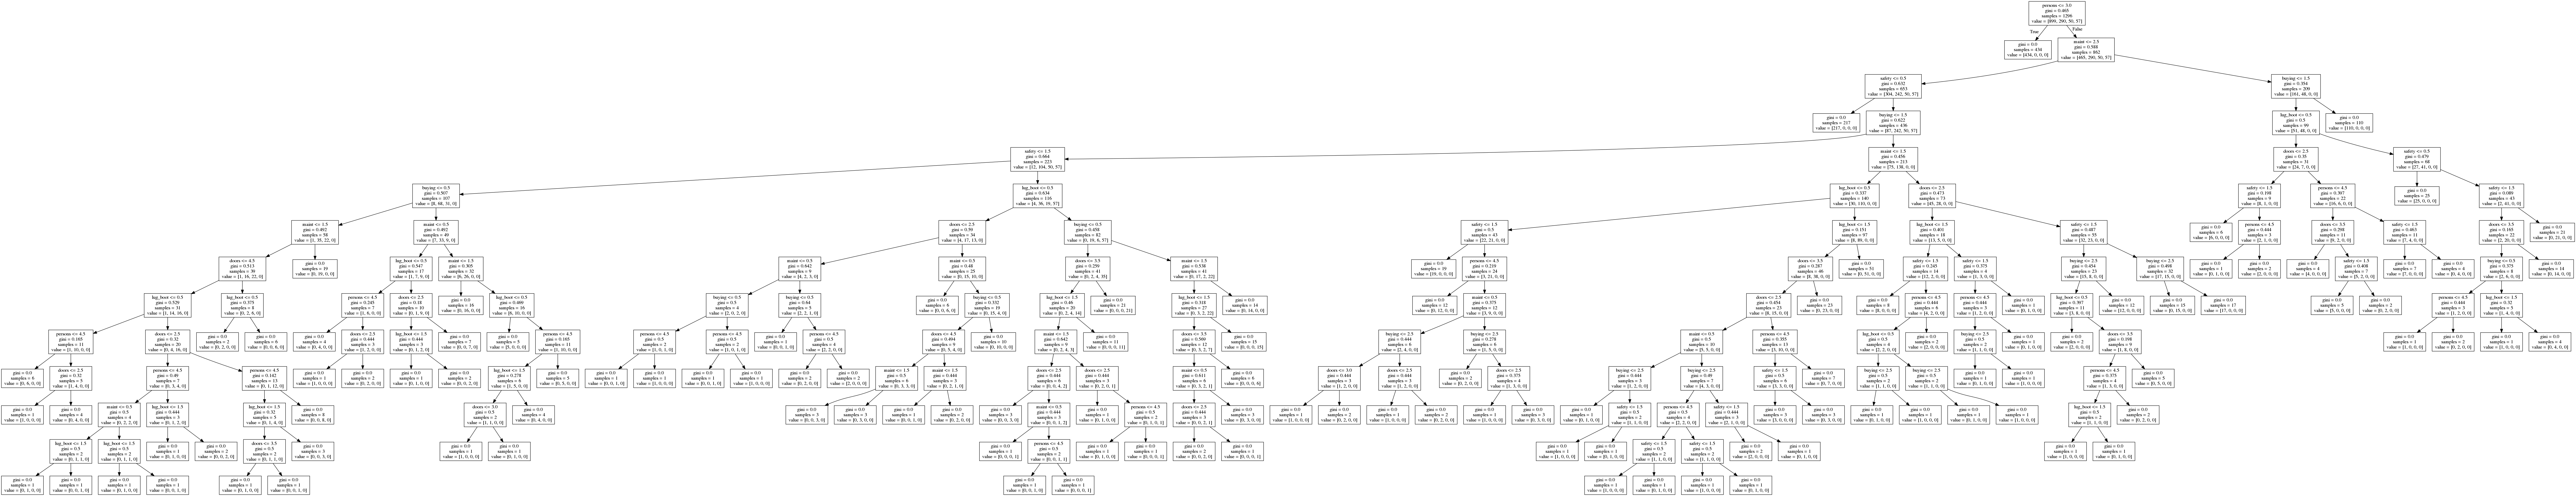

features = 4
accuracy : 0.956018518519


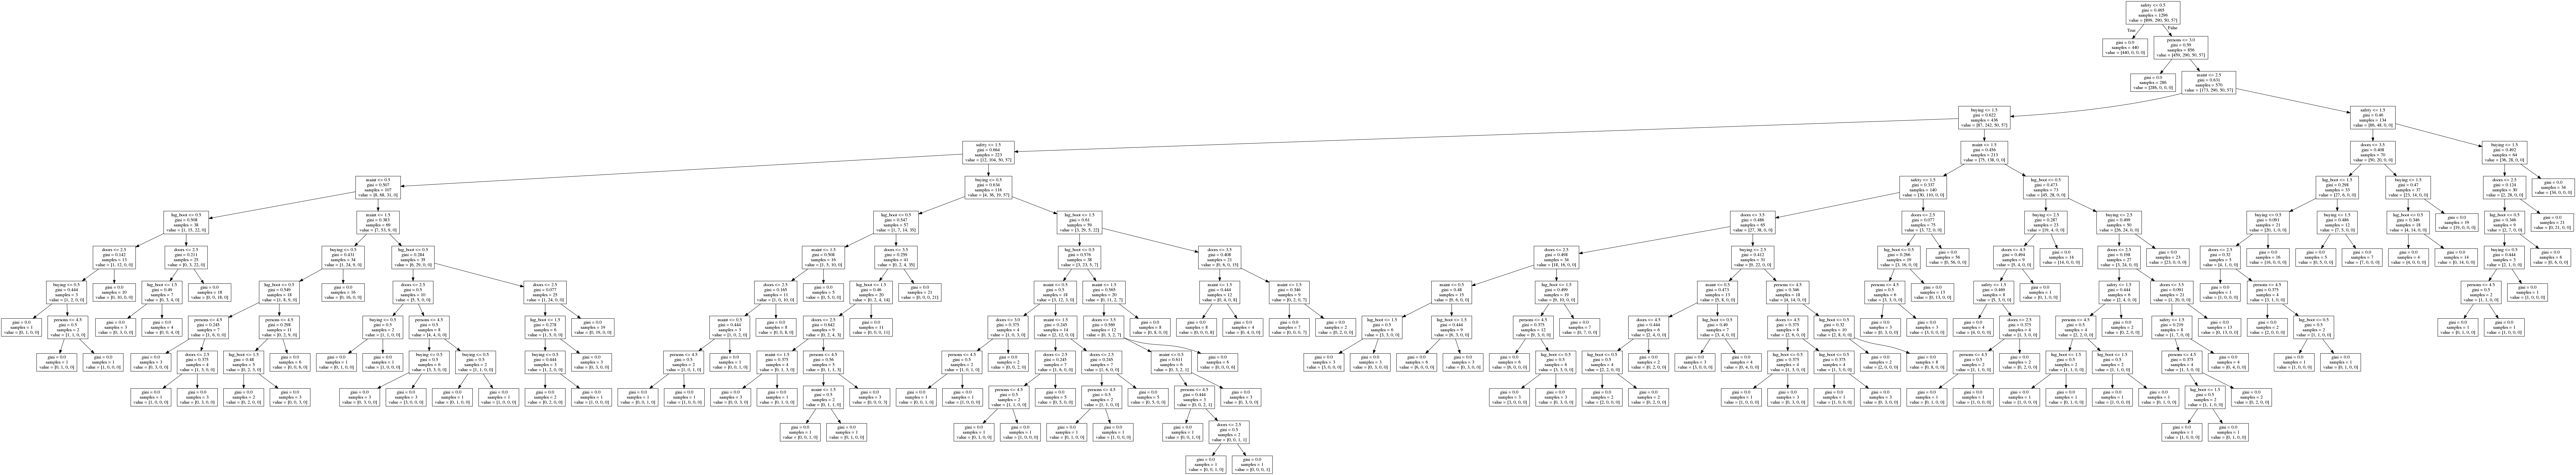

features = 5
accuracy : 0.967592592593


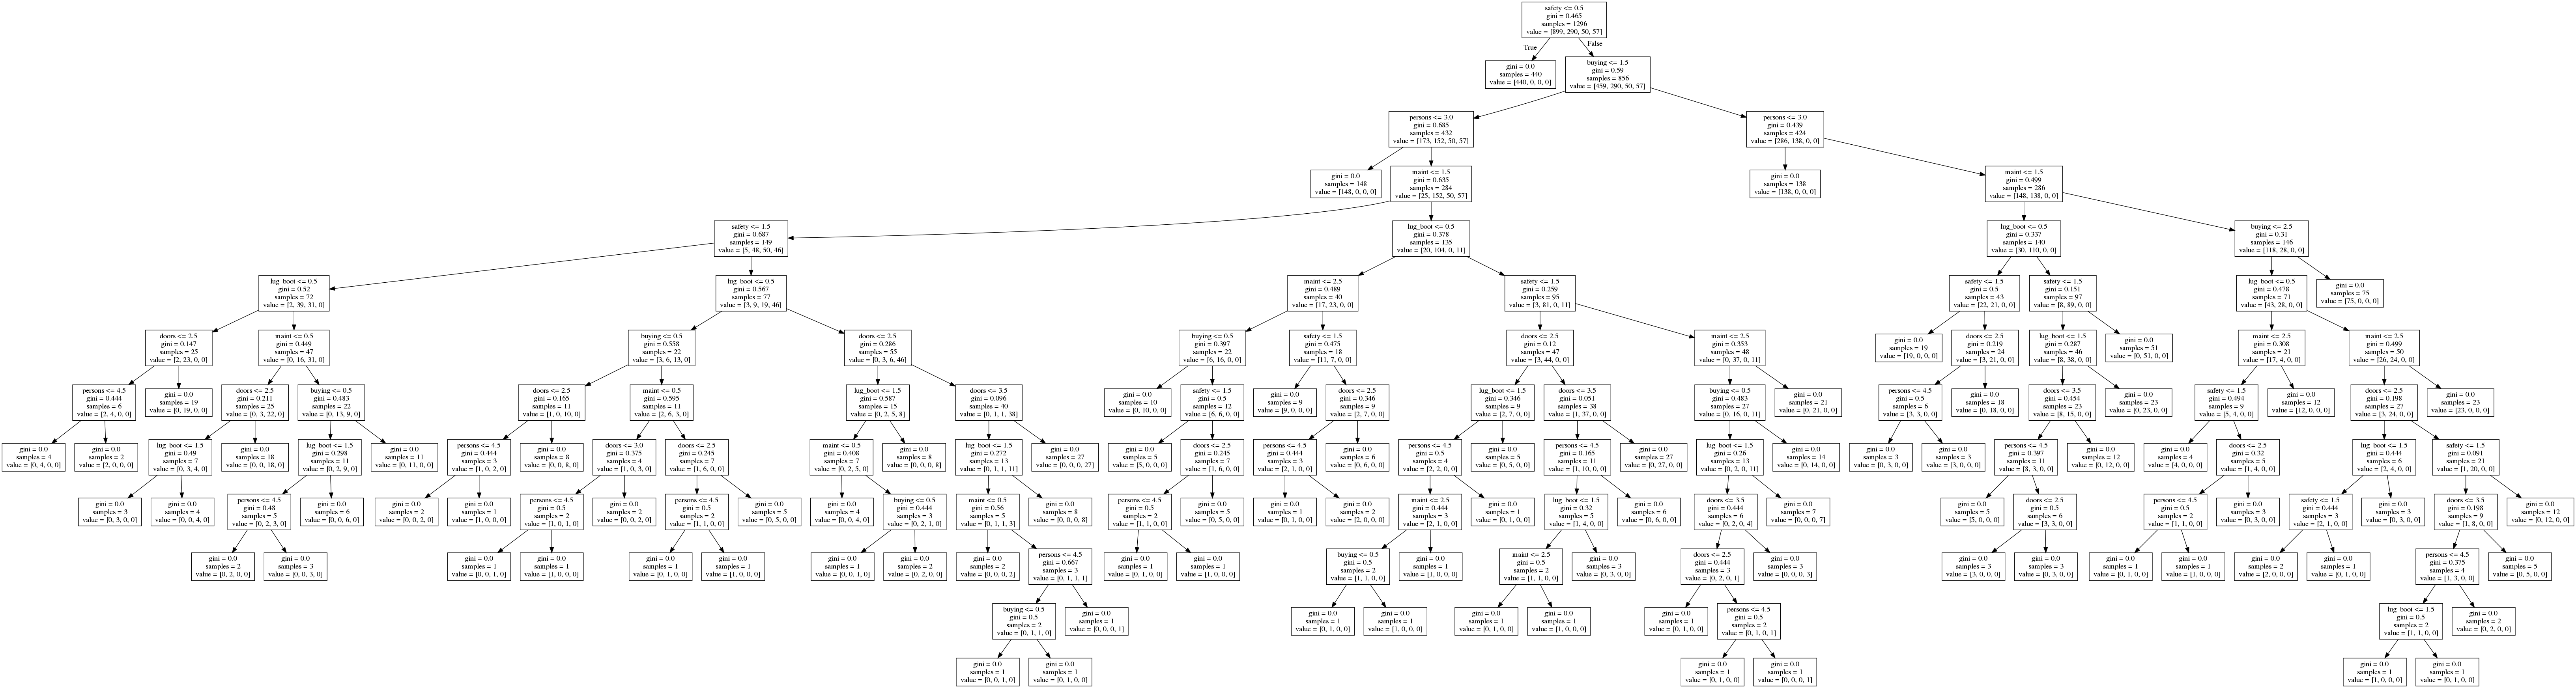

features = 6
accuracy : 0.967592592593


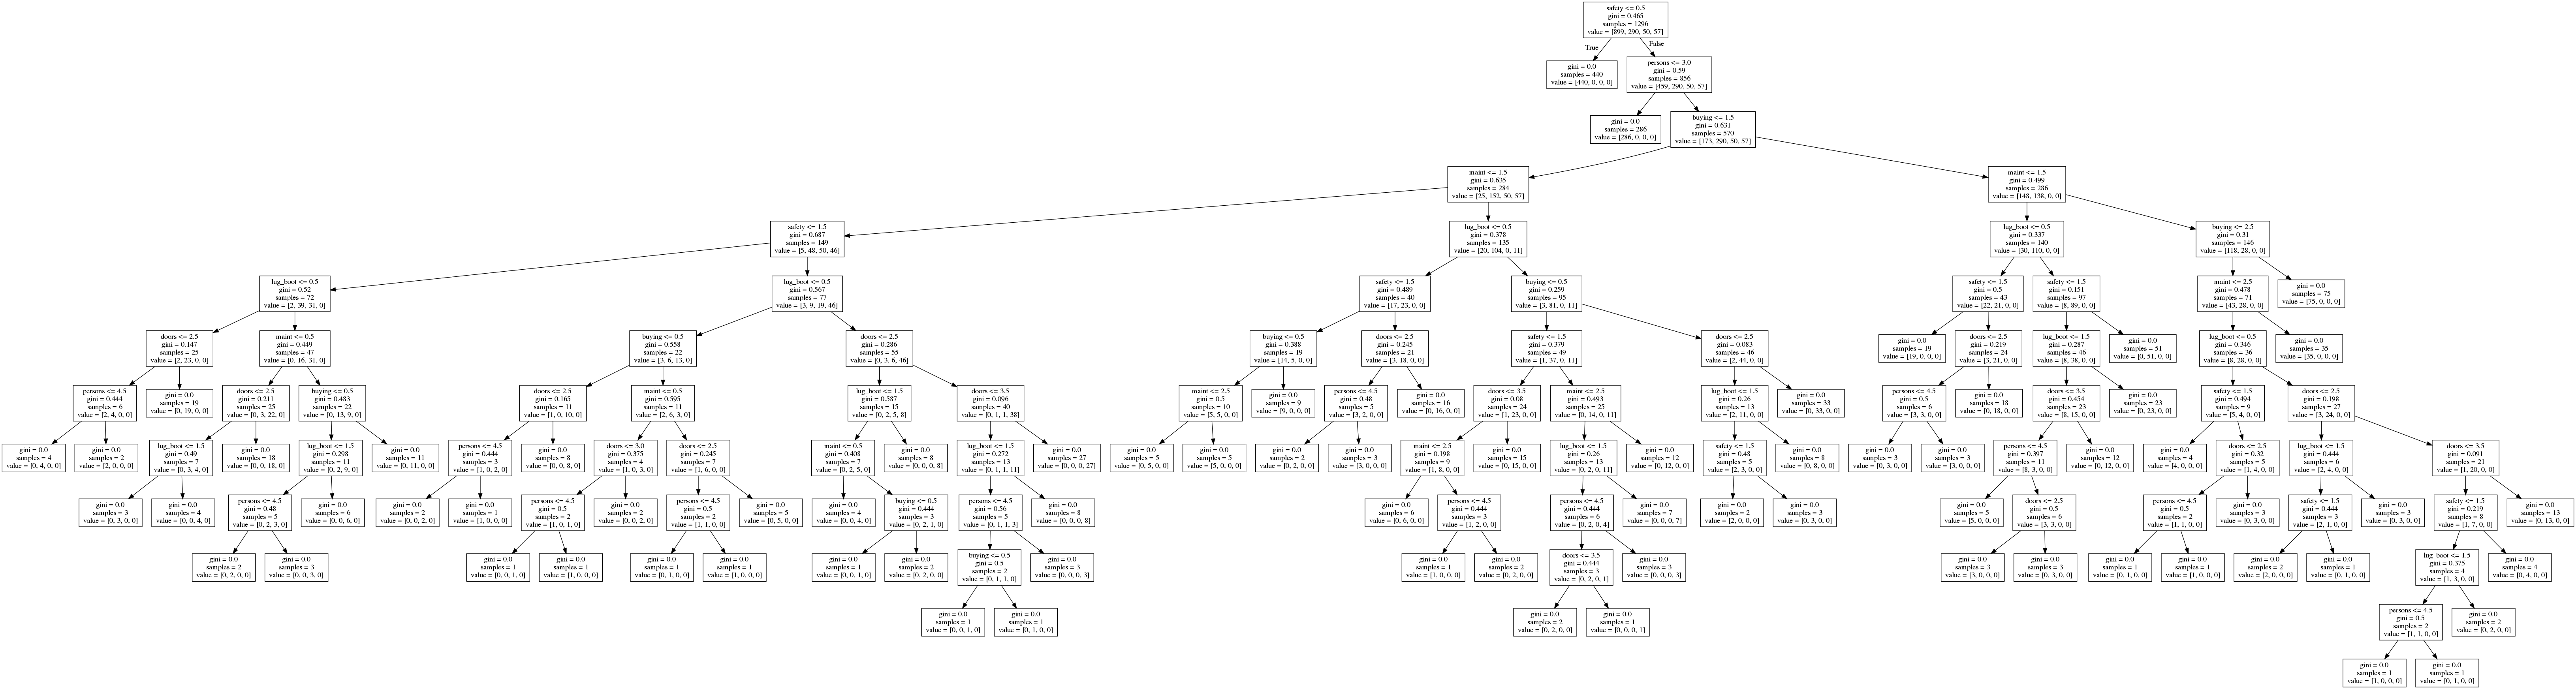

In [22]:
# max_features
for max_features in [1, 2, 3, 4, 5, 6]:
    print('features =', max_features)
    classifier = DecisionTreeClassifier(max_features=max_features)
    classifier.fit(X_train, y_train)
    characterize(classifier.predict(X_test), y_test)
    draw_decision_tree(classifier, headers[:-1])

## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [23]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [24]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [24]:
import collections
from scipy import stats

In [25]:
def entropy(y): 
    counter=collections.Counter(y)
    P = np.fromiter(counter.values(), dtype=float) / len(y)
    return -(P * np.log2(P)).sum()

def gini(y):
    counter=collections.Counter(y)
    P = np.fromiter(counter.values(), dtype=float) / len(y)
    return 1.0 - (P ** 2).sum()

def variance(y):
    return ((y - y.mean())**2).mean()

def mad_median(y):
    med = np.median(y)
    return np.abs(y - med).mean()

In [26]:
class Tree(object):
    def __init__(self, left=None, right=None, data=None, threshold=None, param=None):
        self.left = left
        self.right = right
        self.data = data
        self.t = threshold
        self.param = param
#         self.processed = False

In [27]:
from sklearn.base import BaseEstimator

class DecisionTree(BaseEstimator):
    def __init__(self, max_depth=np.inf, min_samples_split=2, criterion='gini', debug=False):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.debug = debug      
        self.criterion = criterion
        self.tree = Tree()
    
    def _split_by_param(self, X, y, param, threshold):
        indices = X[:, param] < threshold
        return X[indices], y[indices], X[np.logical_not(indices)], y[np.logical_not(indices)]
    
    def _Q(self, X, y, param, t):
        length = len(y)
        _, y_left, _, y_right = self._split_by_param(X, y, param, t)
        return self.F(y) - len(y_left) / length * self.F(y_left) - len(y_right) / length * self.F(y_right)
    
    def _rec_build(self, v, cur_depth):
        if self.debug:
            print('depth', cur_depth, 'datasize=', v.data[0].shape)
#         print(type(v.data))
        if self.debug:
            print('__________________________________\n_____________NEWVERTEX _____________')
#             print('curdepth=', cur_depth, 'vdata =', v.data)
        if cur_depth >= self.max_depth:
            return
        
        if len(v.data[0]) <= self.min_samples_split:
            return
        
        if len(set(v.data[1])) == 1:
            if self.debug:
                print('Single class leaf achieved!')
            return
        
        if self.debug:
            print('\nStart searching!')

        # choosing split params. may be very slow, caution!
        best_param = None
        threshold = None
        best_Q = -np.inf
        for cur_param in self.avaiable_params:
            for t in np.unique(v.data[0][:, cur_param])[1:]:
                
                cur_Q = self._Q(v.data[0], v.data[1], cur_param, t)
                if self.debug:
                    pass
#                     print('_', cur_param, t, cur_Q)
                if cur_Q > best_Q:
                    best_Q, best_param, threshold = cur_Q, cur_param, t
                    if self.debug:
                        print('imp: ', best_Q, best_param, threshold)
        
        v.param = best_param
        v.t = threshold
        
        if self.debug:
            print('..' * cur_depth + 'param =', best_param, ' t =', threshold)
        
        # split
        spl = self._split_by_param(v.data[0], v.data[1], best_param, threshold)
        v.left, v.right  = Tree(data=(spl[0], spl[1])), Tree(data=(spl[2], spl[3]))
        
        # finish
        self._rec_build(v.left,  cur_depth + 1)
        self._rec_build(v.right, cur_depth + 1)
    
    def fit(self, X, y):
        
        if self.criterion == 'gini':
            self.F = gini
            self.type = 'class'
        elif self.criterion == 'entropy':
            self.F = entropy
            self.type = 'class'
        elif self.criterion == 'variance':
            self.F = variance
            self.type = 'reg'
        elif self.criterion == 'mad_median':
            self.F = mad_median
            self.type = 'reg'
        else:
            print('No criterion {} found, used gini instead'.format(criterion))
            self.type = 'class'
            self.F = gini
        if self.debug:
            print('Fitting...')
        X = np.array(X)
        self.tree = Tree(data=(X, y))
        self.avaiable_params = np.arange(X.shape[1])
        if self.type == 'class':
            self.allclasses = list(map(str, list(set(collections.Counter(y)))))
        
        self._rec_build(self.tree, 0)
        if self.debug:
            print('Fitting done!')

    def _rec_predict(self, obj):
        v = self.tree
        while not v == None:
            if v.left == None and v.right == None: 
                if self.type == 'class':
                    return stats.mode(v.data[1]).mode.ravel()[0]
                else:
                    return v.data[1].mean()
            else:
                if obj[v.param] < v.t:
                    v = v.left
                else:
                    v = v.right
                continue
                
    def predict(self, X):
        if self.debug:
            print('Predicting')
        X = pd.DataFrame(X)
        return X.apply(self._rec_predict, axis=1)
        
    def _rec_predict_proba(self, obj):
        v = self.tree
        while not v == None:
            if v.left == None and v.right == None: 
                if self.type == 'class':
                    unique, counts = np.unique(v.data[1], return_counts=True)
                    return dict(zip(list(map(str, unique)), counts / np.sum(counts)))
            else:
                if obj[v.param] < v.t:
                    v = v.left
                else:
                    v = v.right
                continue
    
    def predict_proba(self, X):
        X = pd.DataFrame(X)
        return np.array(pd.DataFrame(list(X.apply(self._rec_predict_proba, axis=1))).fillna(0))
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

Dataset from picture from example http://mlwiki.org/index.php/Cost-Complexity_Pruning

In [334]:
simple_dataset = pd.DataFrame({'x': [1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4],
                               'y': [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
                               'label': [1, 1, 1, 1, 0, 0, 0, 0, 0,0, 1, 1, 0, 0, 1, 1]})
simple_dataset.head()

label  x  y
0      1  1  1
1      1  2  1
2      1  3  1
3      1  4  1
4      0  1  2

In [307]:
simpleX, simpley = simple_dataset.drop(['label'], axis=1), simple_dataset['label']

In [308]:
custom_des_tree = DecisionTree(max_depth=5)
custom_des_tree.fit(simpleX, simpley)

Fitting...
depth 0 datasize= (16, 2)
depth 1 datasize= (4, 2)
Single class leaf achieved!
depth 1 datasize= (12, 2)
depth 2 datasize= (6, 2)
Single class leaf achieved!
depth 2 datasize= (6, 2)
depth 3 datasize= (2, 2)
depth 3 datasize= (4, 2)
Single class leaf achieved!
Fitting done!


In [309]:
custom_des_tree.predict_proba(simpleX)


array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.]])

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [29]:
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1437, 64), (360, 64))

In [35]:
custom_des_tree = DecisionTree(max_depth=4, debug=False)
custom_des_tree.fit(X_train, y_train)
pred = custom_des_tree.predict(X_test)
accuracy_score(pred, y_test)

0.59722222222222221

In [36]:
custom_des_tree = DecisionTree(max_depth=4, criterion='entropy')
custom_des_tree.fit(X_train, y_train)
pred = custom_des_tree.predict(X_test)
accuracy_score(pred, y_test)

0.74444444444444446

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.

In [359]:
parameters = {'max_depth':range(3, 11), 'criterion': ['gini', 'entropy']}
clf = GridSearchCV(DecisionTree(), param_grid=parameters, scoring='accuracy', cv=5)

clf.fit(X_train, y_train)
print('done')

done


Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.

In [360]:
clf.cv_results_

/home/celidos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/celidos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/celidos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/celidos/anaconda3/lib/py

{'mean_fit_time': array([ 2.31570835,  3.16660523,  5.14741974,  5.82926321,  7.44252715,
         7.6880466 ,  7.84840579,  9.74754753,  2.63617382,  4.33258395,
         5.54626679,  5.82084513,  6.63540263,  9.40970297,  9.25272155,
         9.54529252]),
 'mean_score_time': array([ 0.09976478,  0.09828119,  0.10608683,  0.08940358,  0.08980412,
         0.09915881,  0.0846097 ,  0.09478183,  0.10477238,  0.1032197 ,
         0.10804105,  0.07311234,  0.08329554,  0.10795112,  0.07549911,
         0.10500469]),
 'mean_test_score': array([ 0.44954767,  0.54279749,  0.64439805,  0.75086987,  0.81141267,
         0.82393876,  0.8315936 ,  0.84272791,  0.52540014,  0.69659012,
         0.79401531,  0.82741823,  0.84411969,  0.84759916,  0.84759916,
         0.84899095]),
 'mean_train_score': array([ 0.47233481,  0.58507708,  0.69433277,  0.81176418,  0.89579158,
         0.93267552,  0.95929284,  0.97773217,  0.56159246,  0.7270316 ,
         0.85107579,  0.91266387,  0.96033466,  0.981

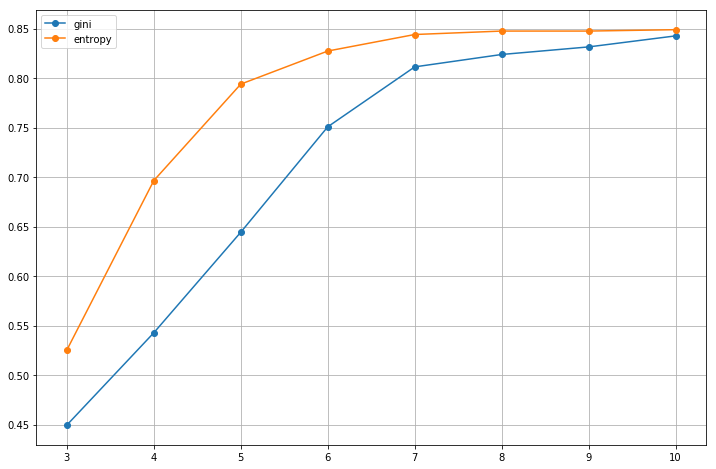

In [387]:
plt.figure(figsize=(12, 8))
plt.plot(clf.cv_results_['param_max_depth'].data[clf.cv_results_['param_criterion']=='gini'].astype(int), 
         clf.cv_results_['mean_test_score'][clf.cv_results_['param_criterion']=='gini'].astype(float),
         label='gini', marker='o')
plt.plot(clf.cv_results_['param_max_depth'].data[clf.cv_results_['param_criterion']=='entropy'].astype(int), 
         clf.cv_results_['mean_test_score'][clf.cv_results_['param_criterion']=='entropy'].astype(float),
         label='entropy', marker='o')
plt.legend()
plt.grid()
plt.show()
# clf.cv_results_['param_max_depth'].data

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [388]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.

In [392]:
des_tree = DecisionTree(max_depth=10, criterion='entropy')
des_tree.fit(X_train, y_train)
pred_proba = des_tree.predict_proba(X_test)

Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.

[ 0.09027778  0.09166667  0.07916667  0.09305556  0.12222222  0.1375
  0.09930556  0.09861111  0.08125     0.10694444]


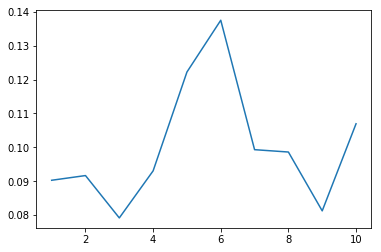

In [399]:
proba_mean = pred_proba.mean(axis=0)
print(proba_mean)
plt.plot(np.arange(1, 11), proba_mean)
plt.show()

Чему примерно равна максимальная вероятность в полученном векторе?

In [398]:
proba_mean.min(), proba_mean.max()

(0.079166666666666663, 0.13750000000000001)

### Регрессия (10% баллов)

С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.

In [400]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [402]:
X, y = boston.data, boston.target
X.shape, y.shape

((506, 13), (506,))

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [406]:
custom_des_tree = DecisionTree(max_depth=6, criterion='variance', debug=False)
custom_des_tree.fit(X_train, y_train)
pred = custom_des_tree.predict(X_test)
mean_squared_error(pred, y_test)

9.3824639531387568

In [407]:
custom_des_tree = DecisionTree(max_depth=6, criterion='mad_median',debug=False)
custom_des_tree.fit(X_train, y_train)
pred = custom_des_tree.predict(X_test)
mean_squared_error(pred, y_test)

15.602954743226318

С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.

In [408]:
parameters = {'max_depth':range(2, 9), 'criterion': ['variance', 'mad_median']}
clf = GridSearchCV(DecisionTree(), param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

clf.fit(X_train, y_train)
print('done')

done


Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.

In [410]:
clf.cv_results_

/home/celidos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/celidos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/celidos/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/celidos/anaconda3/lib/py

{'mean_fit_time': array([ 0.45007415,  0.7118865 ,  1.01021371,  1.18124404,  1.36137185,
         1.56928844,  1.78461757,  1.14433808,  1.63691635,  2.16502104,
         2.67546682,  3.36340489,  3.60521064,  4.05111418]),
 'mean_score_time': array([ 0.00594497,  0.008214  ,  0.00885491,  0.01148491,  0.01198716,
         0.01204677,  0.01286211,  0.00762496,  0.00725551,  0.00838556,
         0.00952377,  0.01184564,  0.01268315,  0.01250257]),
 'mean_test_score': array([-28.32877413, -33.96220395, -29.18451792, -29.4453514 ,
        -28.80887706, -27.68244963, -28.65455276, -31.48577143,
        -31.06786078, -26.93873538, -26.82981941, -28.01272354,
        -28.39724608, -28.03471973]),
 'mean_train_score': array([-25.06436711, -15.10275362,  -9.0419215 ,  -6.22974484,
         -4.01770377,  -2.68817074,  -1.80575246, -26.22979846,
        -16.53796411, -10.89960357,  -6.86552355,  -4.9437262 ,
         -3.48862886,  -2.34221889]),
 'param_criterion': masked_array(data = ['varianc

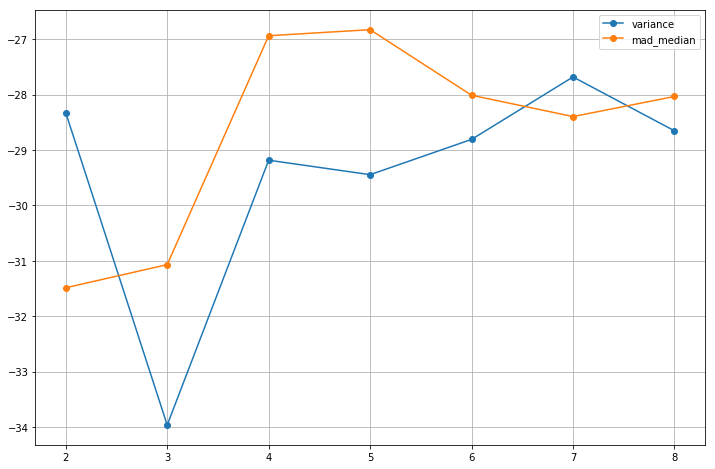

In [411]:
plt.figure(figsize=(12, 8))
plt.plot(clf.cv_results_['param_max_depth'].data[clf.cv_results_['param_criterion']=='variance'].astype(int), 
         clf.cv_results_['mean_test_score'][clf.cv_results_['param_criterion']=='variance'].astype(float),
         label='variance', marker='o')
plt.plot(clf.cv_results_['param_max_depth'].data[clf.cv_results_['param_criterion']=='mad_median'].astype(int), 
         clf.cv_results_['mean_test_score'][clf.cv_results_['param_criterion']=='mad_median'].astype(float),
         label='mad_median', marker='o')
plt.legend()
plt.grid()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [412]:
clf.best_params_

{'criterion': 'mad_median', 'max_depth': 5}